In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from statistics import mean, median
from math import log10

4-parameter logistic equation. A, B, C, and D were generated by Softmax Pro.
Y = D + (A - D)/(1 + (x/C)^B). A = response at zero concentration/lower asymptote, B = slope factor, C = inflection point, D = response at infinite analyte concentration/upper asymptote

In [70]:
#x = [0.001, 13, 52, 210, 840]
#y = [0.047, 0.175, 0.552, 1.408, 2.093]
x = [840, 0, 13, 52, 210]
y = [2.093, 0.047, 0.175, 0.552, 1.408]

x = [x_val if x_val != 0 else 0.001 for x_val in x]
y = [y_val if y_val != 0 else 0.001 for y_val in y]

standardCurve = sorted(zip(x,y))

x = [x[0] for x in standardCurve]
y = [y[1] for y in standardCurve]

[0.1, 8400, 0, 2.5116]

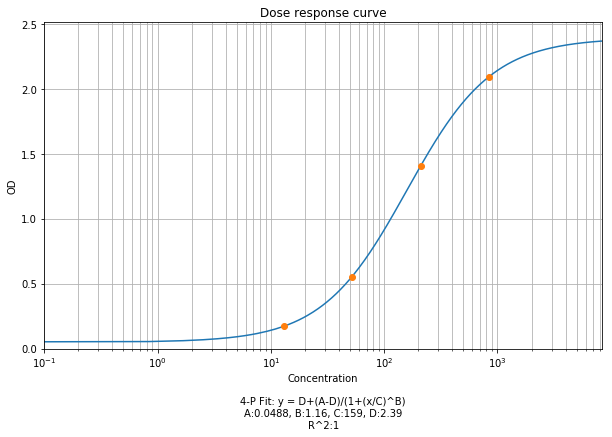

In [72]:
def logistic4(x, A, B, C, D):
    """4PL logistic equation."""
    return D + (A-D)/(1 + (x/C)**B)

def maxSlope(x, y):
    x = [log10(l) for l in [float(i) for i in x]]
    coordinates = zip(x,y)
    x_1, y_1 = 1, y[0] #Trying to make sure first calculation always has zero on top and non-zero on bottom
    slopeList = []
    for x_2, y_2 in coordinates:
        slopeList.append(abs((y_2 - y_1)/(x_2 - x_1))) #Parameter B should always be positive so using abs
        x_1, y_1 = x_2, y_2
    return(max(slopeList))

# Initial guess for parameters
p0 = [y[0], maxSlope(x,y), median(x), y[-1]]

# Fit equation using least squares optimization
popt, pcov = curve_fit(logistic4, x, y, p0)

# Calculate R^2
r_squared = (1 
             - sum([(y_meas - y_calc)**2 for y_meas, y_calc in zip(y, [logistic4(x_std, *popt) for x_std in x])])
             / sum([(y_meas - mean(y))**2 for y_meas in y]))

xCont = np.linspace(0.001, 10*max(x), 10000)
fittedData=[logistic4(xVal, *popt) for xVal in xCont]
fig1 = plt.figure(figsize=(10,6))
ax=fig1.add_subplot(1,1,1)
ax.plot(xCont, fittedData)
ax.set_ylabel("OD")
ax.set_xlabel("""Concentration

4-P Fit: y = D+(A-D)/(1+(x/C)^B)
A:{1:0.3g}, B:{2:0.3g}, C:{3:0.3g}, D:{4:0.3g}
R^2:{0:0.3g}""".format(r_squared, *popt))
ax.grid(True, which='both')
ax.set_title("Dose response curve")
plt.xscale('log')
plt.plot(x, y, 'o')
plt.axis([0.1, 10*max(x), 0, 1.2*max(y)])


In [73]:
x = [0, 0.25, 1, 4, 16, 64]
y = [2.021, 1.767, 1.325, 0.560, 0.203, 0.088]

x = [x_val if x_val != 0 else 0.001 for x_val in x]
y = [y_val if y_val != 0 else 0.001 for y_val in y]

standardCurve = sorted(zip(x,y))

x = [x[0] for x in standardCurve]
y = [y[1] for y in standardCurve]

[2.021, 1.270637496294416, 2.5, 0.088]


[0.1, 640, 0, 2.4252]

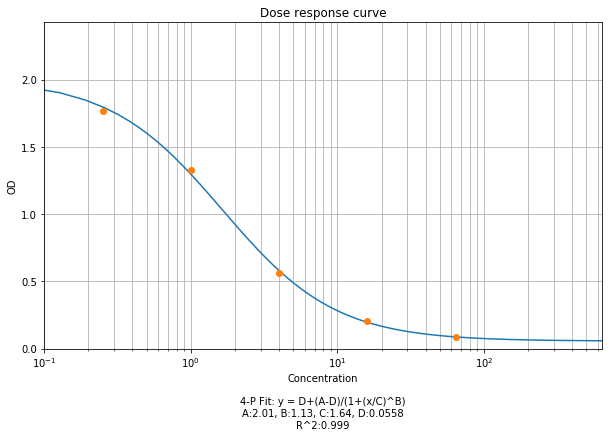

In [74]:
def logistic4(x, A, B, C, D):
    """4PL logistic equation."""
    return D + (A-D)/(1 + (x/C)**B)

def maxSlope(x, y):
    x = [log10(l) for l in [float(i) for i in x]]
    coordinates = zip(x,y)
    x_1, y_1 = 1, y[0] #Trying to make sure first calculation always has zero on top and non-zero on bottom
    slopeList = []
    for x_2, y_2 in coordinates:
        slopeList.append(abs((y_2 - y_1)/(x_2 - x_1))) #Parameter B should always be positive so using abs
        x_1, y_1 = x_2, y_2
    return(max(slopeList))

# Initial guess for parameters
p0 = [y[0], maxSlope(x,y), median(x), y[-1]]
print(p0)

# Fit equation using least squares optimization
popt, pcov = curve_fit(logistic4, x, y, p0)

# Calculate R^2
r_squared = (1 
             - sum([(y_meas - y_calc)**2 for y_meas, y_calc in zip(y, [logistic4(x_std, *popt) for x_std in x])])
             / sum([(y_meas - mean(y))**2 for y_meas in y]))

xCont = np.linspace(0.0001, 10*max(x), 10000)
fittedData=[logistic4(xVal, *popt) for xVal in xCont]
fig1 = plt.figure(figsize=(10,6))
ax=fig1.add_subplot(1,1,1)
ax.plot(xCont, fittedData)
ax.set_ylabel("OD")
ax.set_xlabel("""Concentration

4-P Fit: y = D+(A-D)/(1+(x/C)^B)
A:{1:0.3g}, B:{2:0.3g}, C:{3:0.3g}, D:{4:0.3g}
R^2:{0:0.3g}""".format(r_squared, *popt))
ax.grid(True, which='both')
ax.set_title("Dose response curve")
plt.xscale('log')
plt.plot(x, y, 'o')
plt.axis([0.1, 10*max(x), 0, 1.2*max(y)])